<a href="https://colab.research.google.com/github/luizzwaltrick/IBGE_API/blob/main/Teste_para_est%C3%A1gio_ES_Logistics_%7C_Aldory_Waltrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados exportados para: dados_ibge.csv
    nome      periodo  frequencia
0  MARIA        1930[      336477
1  MARIA  [1930,1940[      749053
2  MARIA  [1940,1950[     1487042
3  MARIA  [1950,1960[     2476482
4  MARIA  [1960,1970[     2495491


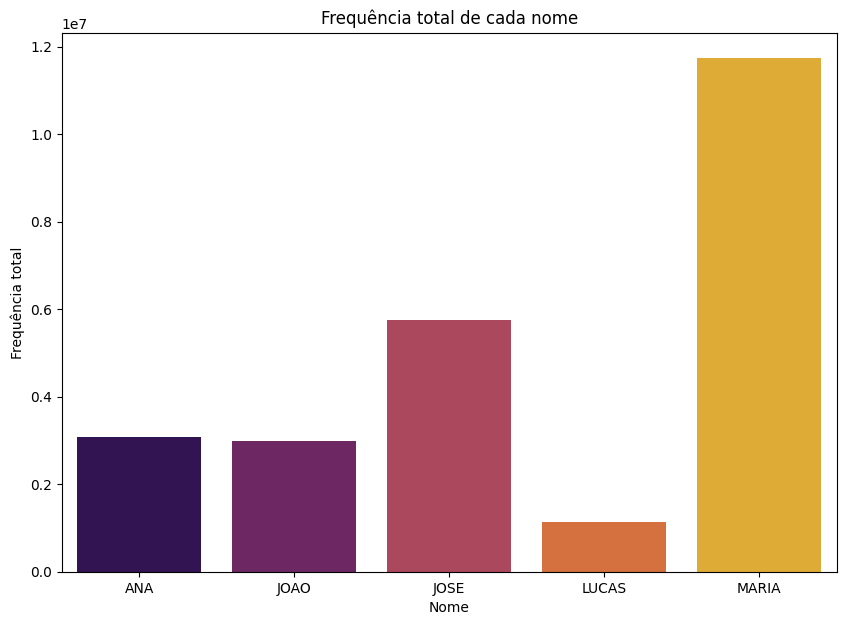

In [13]:
import pandas as pd
import requests
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Tarefa 1: Obtenção e Exportação de Dados

names = ['maria', 'joao', 'ana', 'lucas', 'jose']
data_collected = []

max_retries = 3

try:
    for name in names:
        for attempt in range(max_retries):
            try:
                response = requests.get(f'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{name}?format=json', timeout=10)
                response.raise_for_status()
                data = response.json()

                for item in data:
                    for period in item['res']:
                        data_collected.append({
                            'nome': item['nome'],
                            'periodo': period['periodo'],
                            'frequencia': period['frequencia']
                        })
                break
            except requests.exceptions.RequestException as ex:
                print(f'Erro durante a requisição da API.')
                if attempt < max_retries - 1:
                    time.sleep(2)
                else:
                    raise

    df = pd.DataFrame(data_collected)
    df.to_csv(r'C:\Users\Russo\Downloads\dados_ibge.csv', index=False)
    print("Dados exportados para: dados_ibge.csv")

except Exception as ex:
    print(f'Um erro inesperado aconteceu: {ex}')

if 'df' in locals():
    print(df.head())
else:
    print('DataFrame não encontrada.')


# Tarefa 2: Visualização de Dados

try:
    if 'df' in locals():  # Gráfico de linha usando a lib Plotly Express
        fig = px.line(df, x='periodo', y='frequencia', color='nome',
                      title='Frequência dos nomes ao longo dos períodos',
                      labels={'periodo': 'Período', 'frequencia': 'Frequência', 'nome': 'Nome'})
        fig.show()
    else:
        print('DF não encontrada.')

    # Gráfico de barras usando a lib Seaborn
    if 'df' in locals():
        df_frequencia_total = df.groupby('nome')['frequencia'].sum().reset_index()

        plt.figure(figsize=(10, 7))
        sns.barplot(data=df_frequencia_total, x='nome', y='frequencia', hue='nome', palette='inferno', legend=False)
        plt.title('Frequência total de cada nome')
        plt.xlabel('Nome')
        plt.ylabel('Frequência total')
        plt.show()
    else:
        print('Dataframe não encontrado.')

except Exception as ex:
    print(f'Um erro inesperado aconteceu: {ex}')
